In [1]:
import tensorflow as tf
print(tf.__version__)

2.14.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([Flatten(input_shape=(64,64)), Dense(16, activation='relu')])


In [4]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 16)                65552     
                                                                 
Total params: 65552 (256.06 KB)
Trainable params: 65552 (256.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(filters=1, kernel_size=3, input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(10, activation=Softmax())
])


In [7]:
# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 1)         10        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 1)         0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 169)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1700      
                                                                 
Total params: 1710 (6.68 KB)
Trainable params: 1710 (6.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer='rmsprop', loss="sparse_categorical_crossentropy", metrics=["accuracy", "mse"])


In [9]:
# Print the resulting model attributes
model.metrics_names


[]

***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [12]:
# Print the shape of the training data
train_images.shape


(60000, 28, 28)

In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [14]:
# Rescale the image values so that they lie in between 0 and 1.
min_val = np.min(train_images)
max_val = np.max(train_images)

train_images = (train_images - min_val) / (max_val - min_val)
test_images = (test_images - min_val) / (max_val - min_val)


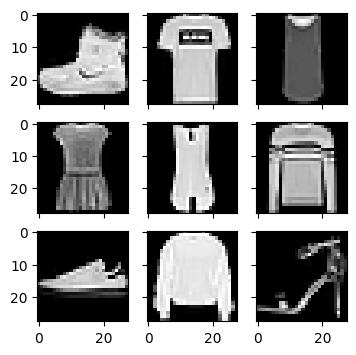

[['Ankle boot', 'T-shirt/top', 'T-shirt/top'],
 ['Trouser', 'Trouser', 'Coat'],
 ['Pullover', 'Sandal', 'Pullover']]

In [15]:
# Display one of the images
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(train_images[i*3+j], cmap=plt.get_cmap("gray"))
plt.show()
[[labels[i+j] for i in train_labels[j:3+j]] for j in range(3)]


#### Fit the model

In [16]:
# Fit the model
history = model.fit(
    train_images.reshape((-1, 28, 28, 1)),
    train_labels,
    epochs=5
)


Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.6636 - accuracy: 0.7671 - mse: 27.6649
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5156 - accuracy: 0.8201 - mse: 27.6736
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4940 - accuracy: 0.8301 - mse: 27.6747
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4840 - accuracy: 0.8342 - mse: 27.6754
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4775 - accuracy: 0.8370 - mse: 27.6755


#### Plot training history

In [17]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)


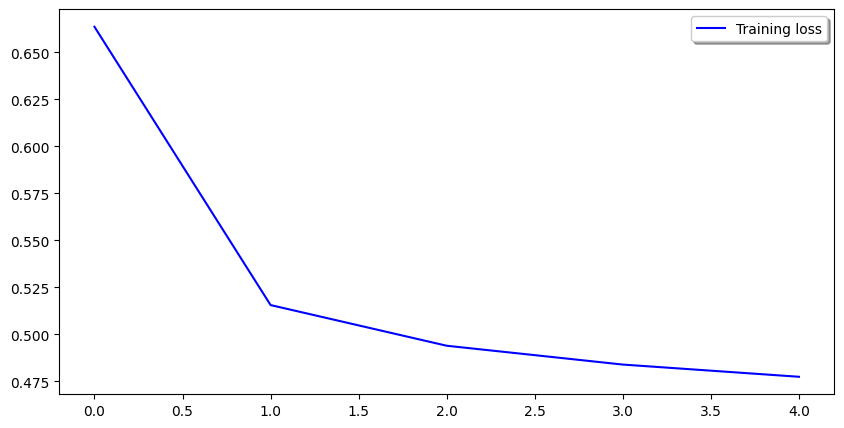

In [18]:
# Make a plot for the loss
plt.figure(figsize=(10,5))

plt.plot(df['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)


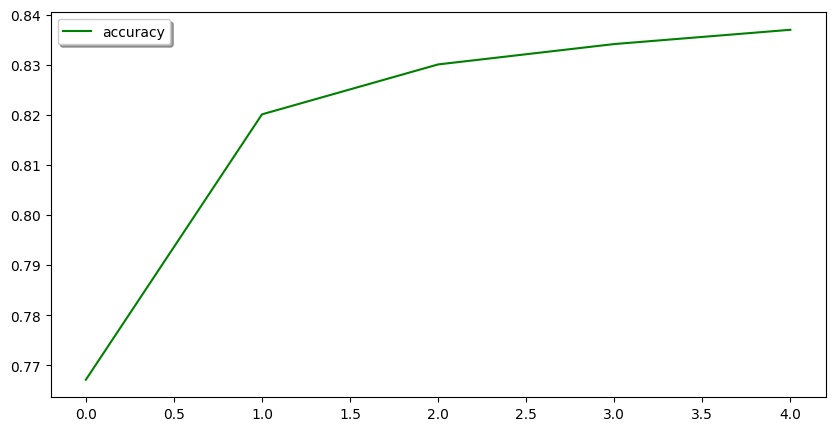

In [19]:
# Make a plot for the accuracy
plt.figure(figsize=(10,5))

plt.plot(history.history['accuracy'], color='g', label='accuracy')
plt.legend(loc='best', shadow=True)


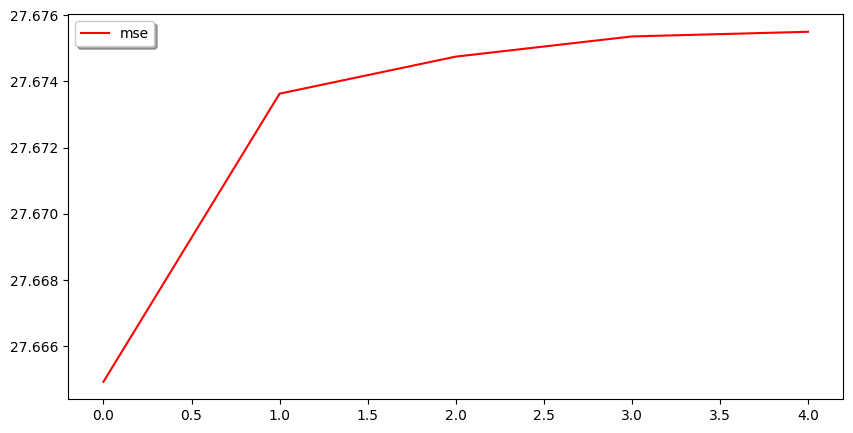

In [20]:
# Make a plot for the additional metric
plt.figure(figsize=(10,5))

plt.plot(history.history['mse'], color='r', label='mse')
plt.legend(loc='best', shadow=True)


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [21]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [23]:
# Evaluate the model
results = model.evaluate(test_images.reshape((-1,28,28,1)), test_labels, batch_size=128)
print(f"test loss: {results[0]},\n test acc:  {results[1]},\n test mse:  {results[2]}")


79/79 [==============================] - 2s 17ms/step - loss: 0.5003 - accuracy: 0.8210 - mse: 27.6757
test loss: 0.5002804398536682,
 test acc:  0.8209999799728394,
 test mse:  27.675674438476562


#### Make predictions from the model

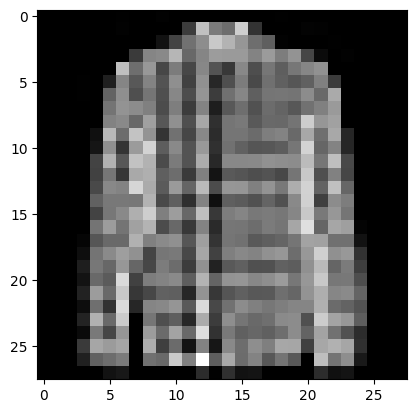

Label: Shirt


In [25]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image, cmap=plt.get_cmap("gray"))
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [26]:
# Get the model predictions
prediction = model.predict(test_image.reshape(-1, 28, 28, 1))
idx = np.argmax(prediction[0])
labels[idx]


1/1 [==============================] - 0s 357ms/step


'Shirt'